In [35]:
import numpy as np
import xgboost as xgb

import matplotlib.pyplot as plt
import seaborn as sns 
import pandas as pd

from sklearn.model_selection import train_test_split, KFold, GridSearchCV
from sklearn import metrics as met
from imblearn.over_sampling import SMOTE

In [4]:
# loading
y = np.genfromtxt('./data/label.csv',delimiter=',')

X = np.genfromtxt('./data/features_deprment_encoded.csv',delimiter=',')


#splitting
x_train, x_val, y_train, y_val = train_test_split(X,
                                                 y,
                                                 test_size = .2,
                                                 random_state=12)

In [36]:
heads = pd.read_csv('./data/eemployes_data.csv')

In [37]:
heads.columns

Index(['satisfaction', 'evaluation', 'number_of_projects',
       'average_montly_hours', 'time_spend_company', 'work_accident', 'churn',
       'promotion', 'department', 'salary'],
      dtype='object')

In [5]:
# resampling the traninging data to change the balnce the data
sm = SMOTE(random_state=12)
x_res, y_res = sm.fit_sample(x_train, y_train)

In [6]:
xgb_model = xgb.XGBClassifier().fit(x_res, y_res)

In [7]:
predictions = xgb_model.predict(x_val)
actuals = y_val
print(met.confusion_matrix(actuals, predictions))

[[2243   13]
 [  24  720]]


In [8]:
(2243+720)/(2243+24+720+13)

0.9876666666666667

In [9]:
xgb_model = xgb.XGBClassifier().fit(x_train, y_train)

In [10]:
predictions = xgb_model.predict(x_val)
actuals = y_val
print(met.confusion_matrix(actuals, predictions))

[[2246   10]
 [  24  720]]


In [11]:
kf = KFold(n_splits=5, shuffle=True, random_state=12)
for train_index, test_index in kf.split(X):
    xgb_model = xgb.XGBClassifier().fit(X[train_index], y[train_index])
    predictions = xgb_model.predict(X[test_index])
    actuals = y[test_index]
    print(met.confusion_matrix(actuals, predictions))

[[2246   10]
 [  24  720]]
[[2297   10]
 [  29  664]]
[[2305   10]
 [  19  666]]
[[2261   10]
 [  41  688]]
[[2266   13]
 [  30  690]]


In [13]:
clf = GridSearchCV(xgb_model,
                   {'max_depth': [2, 4, 6],
                    'n_estimators': [50, 100, 200]}, verbose=1)
clf.fit(x_res, y_res)
print(clf.best_score_)
print(clf.best_params_)

Fitting 5 folds for each of 9 candidates, totalling 45 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done  45 out of  45 | elapsed:   42.5s finished


0.989042949668492
{'max_depth': 6, 'n_estimators': 200}


In [18]:
clf.score(x_val,y_val)

0.99

In [22]:
import seaborn as sns

In [28]:
x_val.shape

(3000, 10)

In [38]:
sorted(zip(heads.columns,xgb_model.feature_importances_),key=lambda x: x[1], reverse=True)

[('satisfaction', 0.30028817),
 ('time_spend_company', 0.26541078),
 ('number_of_projects', 0.15076128),
 ('evaluation', 0.08586524),
 ('work_accident', 0.056316167),
 ('churn', 0.04511207),
 ('average_montly_hours', 0.044453822),
 ('salary', 0.020159677),
 ('promotion', 0.01657265),
 ('department', 0.015060137)]

In [29]:
np.arange(3000)[clf.predict_proba(x_val)[:,0]+y_val<0.5]

array([ 292,  513,  775, 1346, 1457, 1488, 1654, 1670, 2022, 2322, 2594,
       2934, 2996])

In [30]:
np.arange(3000)[clf.predict_proba(x_val)[:,0]+y_val>1.5]

array([  70,  471,  915, 1121, 1126, 1296, 1387, 1464, 1609, 1722, 2141,
       2294, 2379, 2473, 2792, 2818, 2900])

<AxesSubplot:title={'center':'Feature importance'}, xlabel='F score', ylabel='Features'>

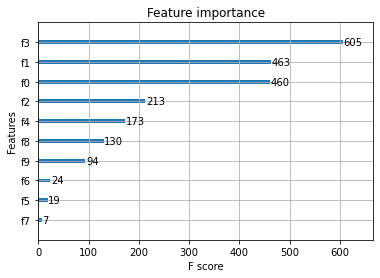

In [42]:
#import graphviz
xgb.plot_importance(xgb_model)

In [25]:
y_val

array([0., 1., 0., ..., 0., 1., 1.])

In [ ]:

tr = 'ADMINISTRATIVER MITARBEITER DES TECHNISCHEN DIREKTORS (CTO) UND HR-MANAGERS'
tr.title()

In [17]:
x_val

array([[0.41758242, 0.78125   , 0.4       , ..., 0.        , 0.17008547,
        0.5327998 ],
       [0.37362638, 0.171875  , 0.        , ..., 0.        , 1.        ,
        0.68594176],
       [0.61538464, 0.96875   , 0.2       , ..., 0.        , 0.07749288,
        0.51244545],
       ...,
       [0.71428573, 0.6875    , 0.4       , ..., 0.        , 0.07749288,
        0.51244545],
       [0.25274727, 0.21875   , 0.        , ..., 0.        , 1.        ,
        0.68594176],
       [0.7802198 , 0.765625  , 0.4       , ..., 0.        , 0.        ,
        0.        ]])